<a href="https://colab.research.google.com/github/SuryaVamshi04/SyMPox/blob/main/Main_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: A Automated MonkeyPox Detection System and Forecasting

#### Group Member Names :  
1. Akshay Dandotikar   
2. Suryavamshi Arakatala



### INTRODUCTION:

*********************************************************************************************************************

#### AIM :
SyMPox utilizes the robust XGBoost algorithm  to analyze symptom patterns and provide accurate assessments while ARIMA model is used to forecast impact of MonkeyPox. IT is developed using the Gradio framework, SyMPox offers a user-friendly platform for individuals to assess their symptoms and obtain reliable Monkeypox diagnoses.

*********************************************************************************************************************

#### Github Repo: https://github.com/alirezafarzipour/SyMPox/tree/main
*********************************************************************************************************************

#### DESCRIPTION OF PAPER:
Monkeypox is a zoonotic disease. About 87000 cases of monkeypox were confirmed by the World Health Organization until June 2023. The most prevalent methods for identifying this disease are image-based recognition techniques. Still, they are not too fast and could only be available to a few individuals. This study presents an independent application named SyMPox, developed to diagnose Monkeypox cases based on symptoms

*********************************************************************************************************************

#### PROBLEM STATEMENT :
The problem statement revolves around the need for early detection and accurate forecasting of Monkeypox cases to facilitate prompt public health interventions and mitigate the spread of the disease. Monkeypox outbreaks can have significant public health implications, and timely detection is crucial for effective containment measures.

*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM:

It is a rare disease that manifests with symptoms similar to smallpox, including fever, rash, and swollen lymph nodes. While Monkeypox outbreaks are infrequent, they can lead to severe illness and have the potential to spread rapidly within communities. Additionally, the similarity of Monkeypox symptoms to other diseases poses challenges for accurate diagnosis and surveillance.

*********************************************************************************************************************

#### SOLUTION:
The proposed solution involves leveraging machine learning techniques to enhance the detection and forecasting of Monkeypox cases. By analyzing reported symptoms and historical case data, machine learning algorithms can identify patterns indicative of Monkeypox infection and predict future outbreaks. The solution aims to improve the early detection of Monkeypox cases, enabling timely public health interventions and containment measures to minimize the impact of outbreaks.



# Background
*********************************************************************************************************************


Reference: [1]

Explanation :https://github.com/alirezafarzipour/SyMPox

Dataset/Input : https://github.com/alirezafarzipour/SyMPox/blob/main/Data.csv

Weakness : Only reliance on symptom-based data, which can be subjective and prone to variability


*********************************************************************************************************************






In [9]:
!pip install gradio

# Implement paper code :
*********************************************************************************************************************

In [10]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
import gradio as gr
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import warnings

In [11]:
warnings.filterwarnings('ignore')
# from PIL import Image
print('Gradio version: ', gr.__version__)

Gradio version:  4.27.0


In [12]:
# define dataset
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [13]:
# Oversample with SMOTE and random undersample for imbalanced dataset
# define pipeline
over = SMOTE(sampling_strategy=0.5, random_state=27) #8
under = RandomUnderSampler(sampling_strategy=0.5, random_state=376) #1
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [14]:
# transform the dataset
X, y = pipeline.fit_resample(X, y)

# split dataset to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=354)

In [15]:
# define model and make prediction on test set
classifier = XGBClassifier(learning_rate=0.0991, gamma=0, n_estimators = 80)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [16]:
# confusion matrix & accuracy score
cm = confusion_matrix(y_test, y_pred)
print('\n', cm)
print('\naccuracy:   ', accuracy_score(y_test, y_pred))


 [[15  2]
 [ 1 38]]

accuracy:    0.9464285714285714


In [17]:
# creating a graphic environment
header = dataset.columns[1:-1]

def predict(symptoms):
    new_sample = [0]*len(header)
    for i in range(len(header)):
        for j in range(len(symptoms)):
            if header[i] == symptoms[j]:
                new_sample[i] = 1
    pred = classifier.predict(np.array(new_sample).reshape(1, len(header)))
    print(pred)

    if pred == 1:
      return  'positive.png', '❌ Regrettably, there exists a possibility of Monkeypox.'

    else:
      return  'negative.png', '✔️ Fortunately, you have been spared from the presence of Monkeypox. It is recommended to consult with a medical professional for further confirmation.'


title='🐒🦠 Detection of Monkeypox Cases Based on Symptoms'
des='1. Kindly choose the symptoms you are experiencing from the provided section below and proceed by clicking the <b>Submit</b> button. The outcome will be displayed in the <u>output</u> section for your reference\n2. If you wish to reset the selected symptoms, simply click the <b>Clear</b> button.'

out_text = gr.Textbox(label="Result")
out_image = gr.Image(label=" ")
demo = gr.Interface(fn=predict, inputs=gr.CheckboxGroup(list(header)), outputs=[out_image, out_text], allow_flagging="never",
                   title=title, description=des)

if __name__ == "__main__":
    demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6828f20cac617d4df7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


*********************************************************************************************************************
### Contribution  Code :


In [18]:
!pip install plotly_express
!pip install plotly

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import plotly_express as px
import plotly.graph_objects as go
%config InlineBackend.figure_format ='retina'

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [20]:
Case_worldwide= pd.read_csv('Monkey_Pox_Cases_Worldwide.csv')

In [21]:
Case_worldwide.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3412.0,0.0,5.0,2.0,7.0
1,Portugal,908.0,0.0,0.0,0.0,34.0
2,Spain,7083.0,0.0,13.0,2.0,0.0
3,United States,24403.0,0.0,4.0,41.0,11.0
4,Canada,1388.0,12.0,1.0,5.0,0.0


In [22]:
Case_worldwide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             129 non-null    object 
 1   Confirmed_Cases     129 non-null    float64
 2   Suspected_Cases     129 non-null    float64
 3   Hospitalized        129 non-null    float64
 4   Travel_History_Yes  129 non-null    float64
 5   Travel_History_No   129 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.2+ KB


In [23]:
# Monkey Pox affected countries worldwide

def plot_map(df,col, title):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country", locationmode='country names',
                  color=col, hover_name="Country",
                  title=title, hover_data=[col], color_continuous_scale="Plasma")
    fig.show()

def treemap_plot(col):
    fig = px.treemap(Case_worldwide, path=["Country"], values=col, height=700,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

In [24]:
plot_map(Case_worldwide,'Confirmed_Cases', 'Confirmed Cases by Country')

In [25]:
treemap_plot('Confirmed_Cases')

In [26]:
plot_map(Case_worldwide, 'Suspected_Cases', 'Suspected Cases by Country')

In [27]:
# Time Series Analysis of Daily Reported Cases.
cases_confirmed = pd.read_csv('Daily_Country_Wise_Confirmed_Cases.csv')

In [28]:
cases_confirmed.set_index('Country', inplace=True)
daily_country_cases = cases_confirmed.T
daily_country_cases.head()

Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,Belgium,...,Paraguay,South Sudan,El Salvador,Hong Kong,Egypt,Jordan,Guam,Ukraine,Bahrain,China
2022-01-31,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-17,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-04,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-31,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
daily_country_cases['Total_cases'] = daily_country_cases.sum(axis=1)
daily_country_cases['Total_cases']

2022-01-31       3
2022-02-17       3
2022-02-28       1
2022-03-04       2
2022-03-31       6
              ... 
2022-09-18       4
2022-09-19    1355
2022-09-20     660
2022-09-21     486
2022-09-22     311
Name: Total_cases, Length: 141, dtype: int64

In [30]:
daily_country_cases.index = pd.to_datetime(daily_country_cases.index)

In [31]:
fig = px.line(daily_country_cases, y='Total_cases',labels={'Total_cases':'Total Cases','index':'Date'},title='Monkey Pox Cases Reported Daily Over Time',color_discrete_sequence=['#6F1DBD'], markers=True)
fig.update_layout(hovermode="x")
fig.show()

In [32]:
daily_country_cases.index = pd.DatetimeIndex(daily_country_cases.index).to_period('D')

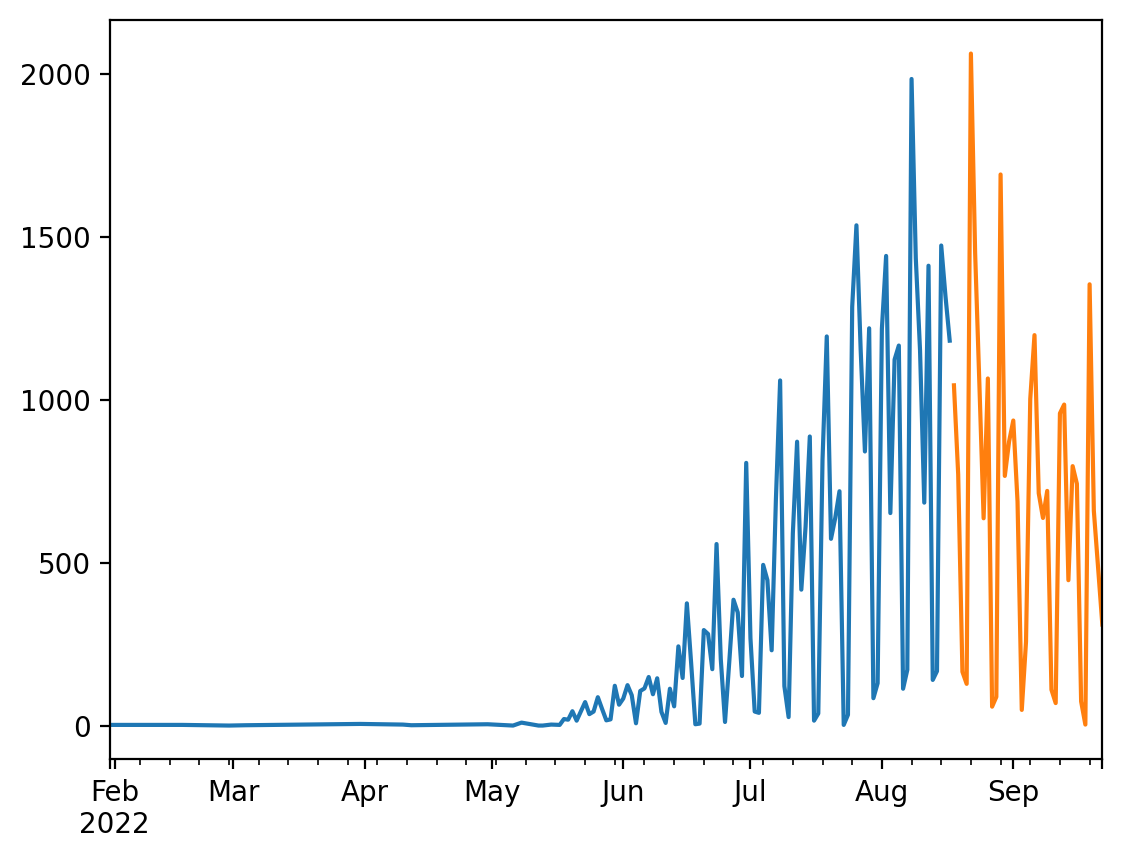

In [33]:
#divide into train and validation set
train = daily_country_cases[:int(0.75*(len(daily_country_cases)))]
test = daily_country_cases[int(0.75*(len(daily_country_cases))):]

#plotting the data
train['Total_cases'].plot()
test['Total_cases'].plot()
plt.show()

In [34]:
# Training the ARIMA Model
model=sm.tsa.arima.ARIMA(daily_country_cases['Total_cases'],order=(12,2,9))
arima_model = model.fit()

In [35]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Total_cases   No. Observations:                  141
Model:                ARIMA(12, 2, 9)   Log Likelihood                -942.053
Date:                Fri, 19 Apr 2024   AIC                           1928.106
Time:                        00:13:46   BIC                           1992.664
Sample:                    01-31-2022   HQIC                          1954.341
                         - 09-22-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1625      1.095     -1.061      0.288      -3.309       0.984
ar.L2         -0.7917      1.099     -0.720      0.471      -2.946       1.363
ar.L3         -1.2438      1.053     -1.181      0.238      -3.308       0.820
ar.L4         -1.0085      1.184     -0.852      0.394      -3.330       1.313
ar.L5         -0.9350      1.080     -0.866      0.387      -3.052       1.182
ar.L6         -1.1577      1.161     -0.998      0.318      -3.432       1.117
ar.L7         -0.2696      1.095     -0.246      0.805      -2.416       1.876
ar.L8         -0.1113      0.481     -0.232      0.817      -1.053       0.831
ar.L9         -0.4184      0.410     -1.022      0.307      -1.221       0.384
ar.L10        -0.0411      0.541     -0.076      0.940      -1.102       1.020
ar.L11        -0.1985      0.437     -0.454      0.650      -1.055       0.658
ar.L12        -0.2708      0.354     -0.764      0.445      -0.965       0.424
ma.L1         -0.7802      1.104     -0.707      0.480      -2.944       1.383
ma.L2         -0.5865      1.240     -0.473      0.636      -3.018       1.844
ma.L3          0.7575      0.603      1.255      0.209      -0.425       1.940
ma.L4         -0.4612      0.893     -0.516      0.606      -2.212       1.290
ma.L5         -0.0653      0.543     -0.120      0.904      -1.130       1.000
ma.L6          0.4693      0.556      0.845      0.398      -0.620       1.558
ma.L7         -0.4306      0.426     -1.011      0.312      -1.266       0.404
ma.L8          0.0539      0.540      0.100      0.920      -1.004       1.112
ma.L9          0.2314      0.492      0.471      0.638      -0.732       1.195
sigma2      5.082e+04   7147.472      7.111      0.000    3.68e+04    6.48e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 8.34
Prob(Q):                              0.71   Prob(JB):                         0.02
Heteroskedasticity (H):              21.07   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

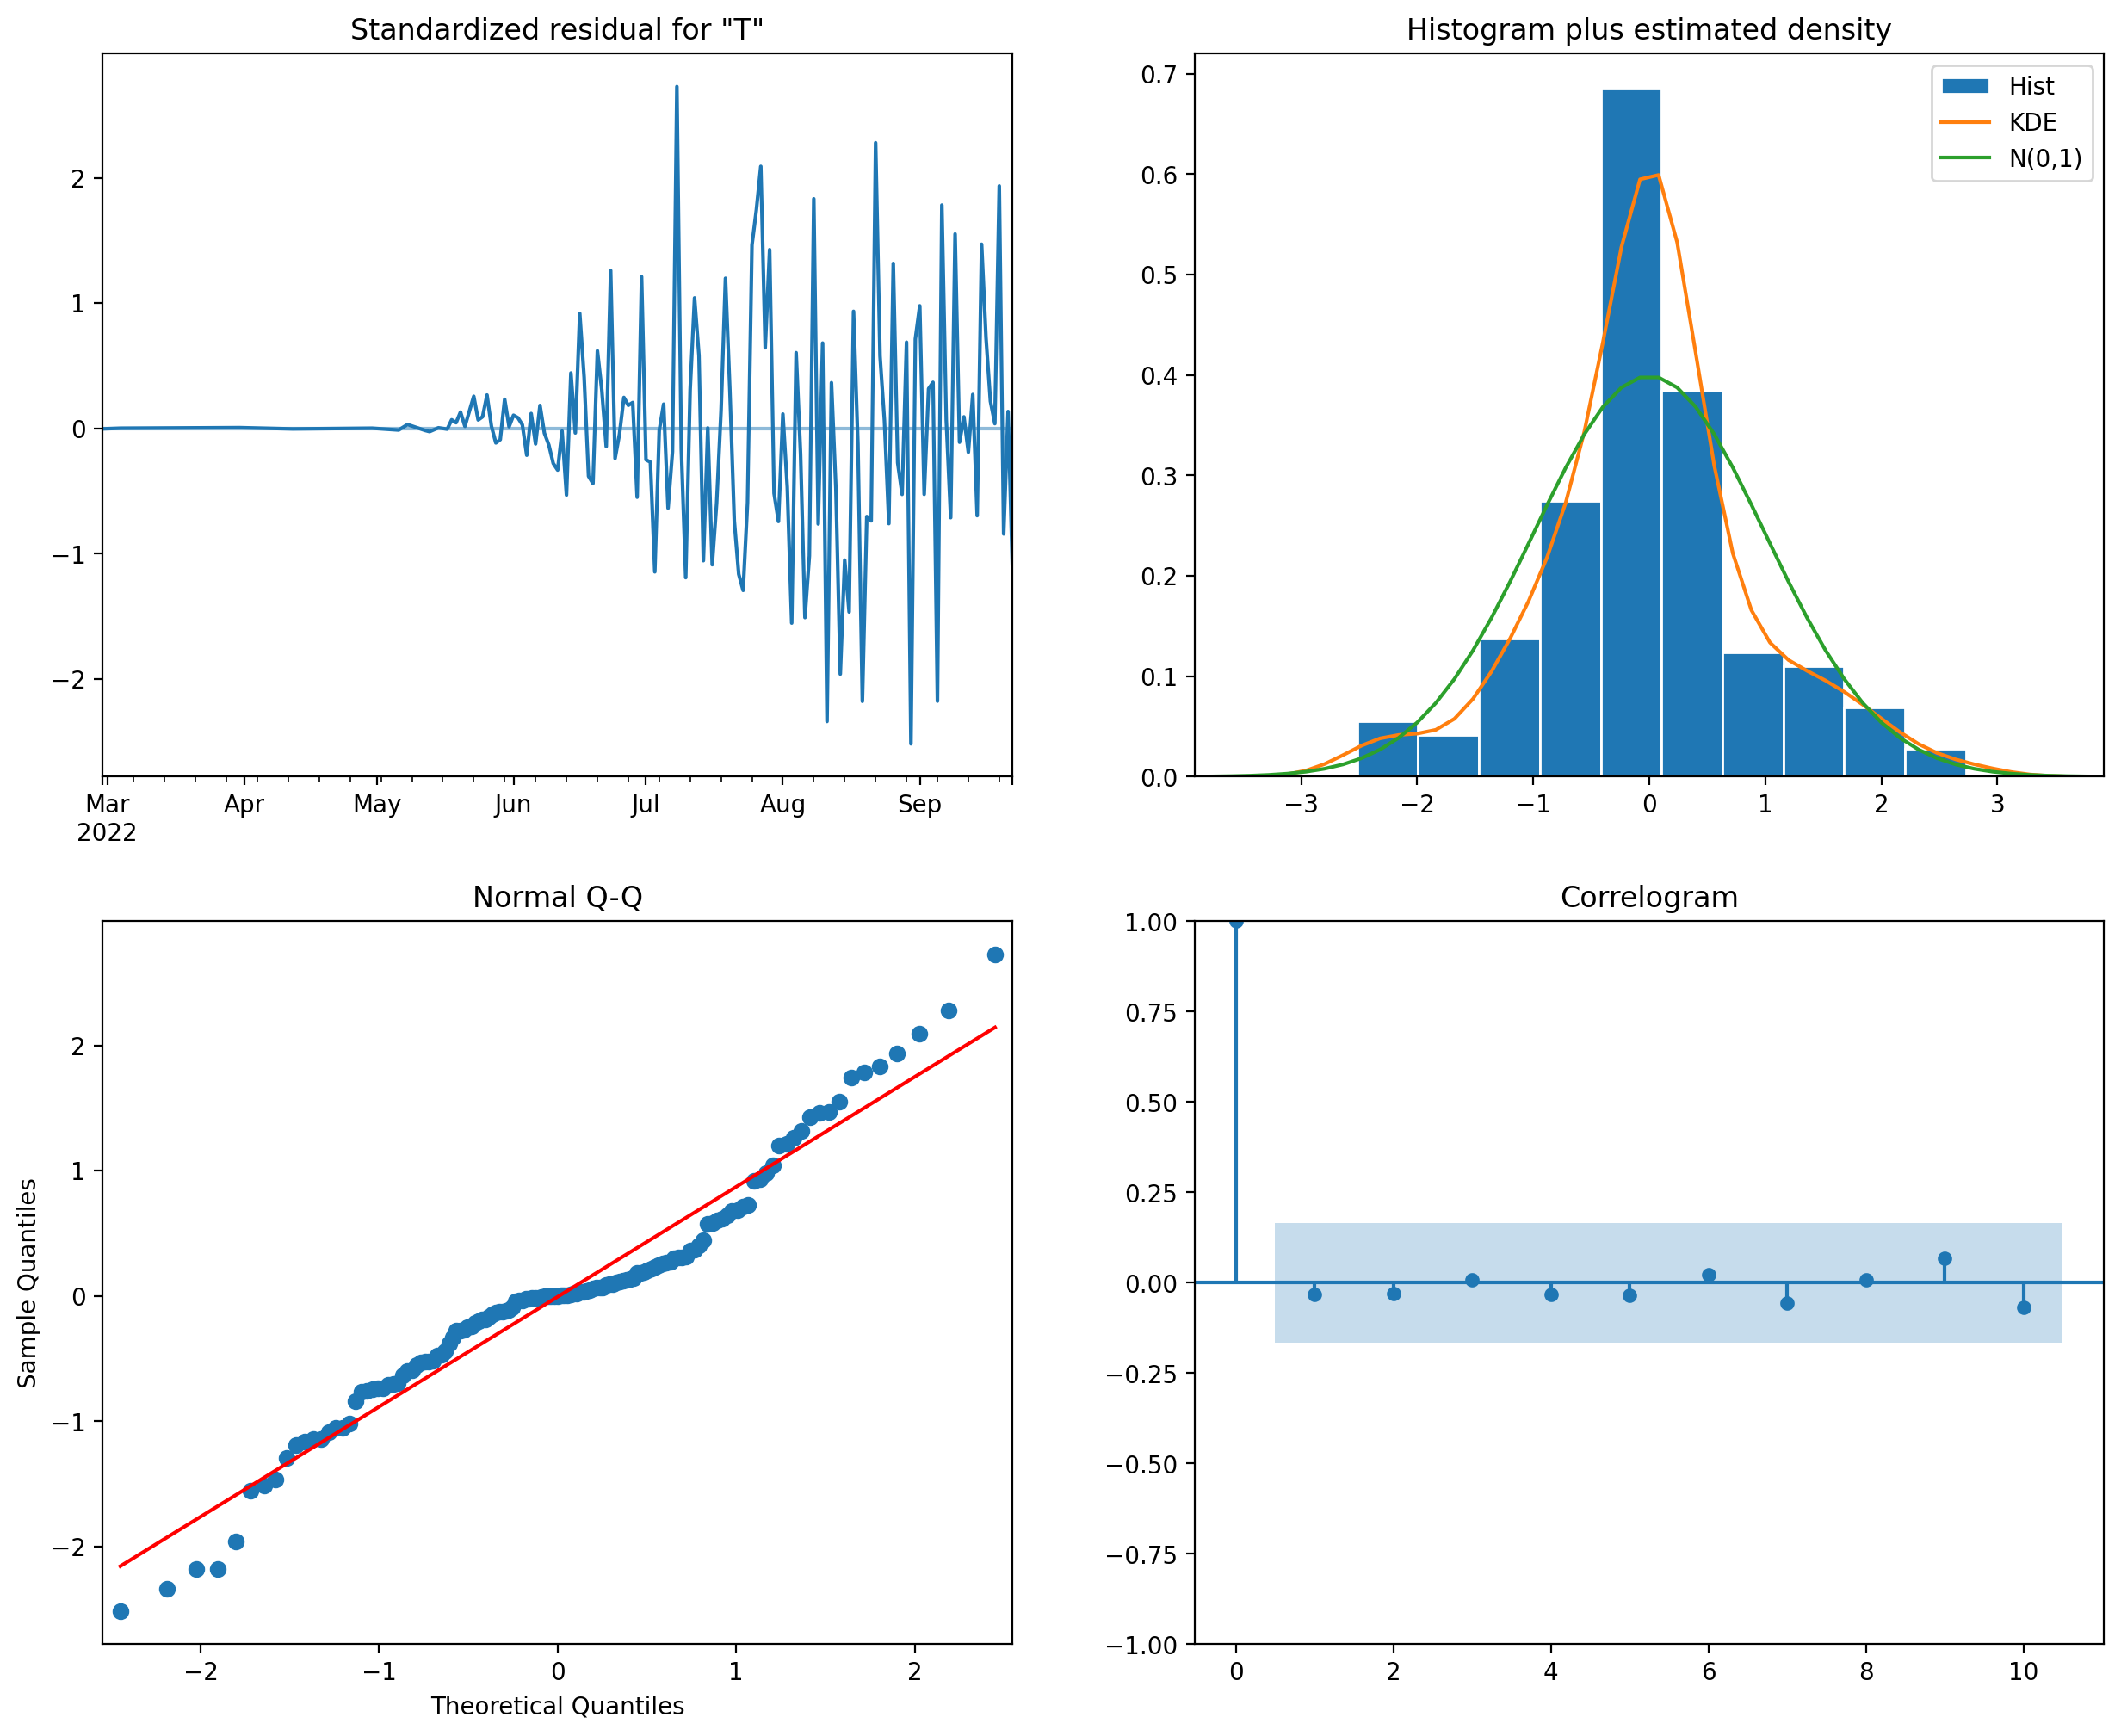

In [36]:
arima_model.plot_diagnostics(figsize=(15,12))
plt.show()

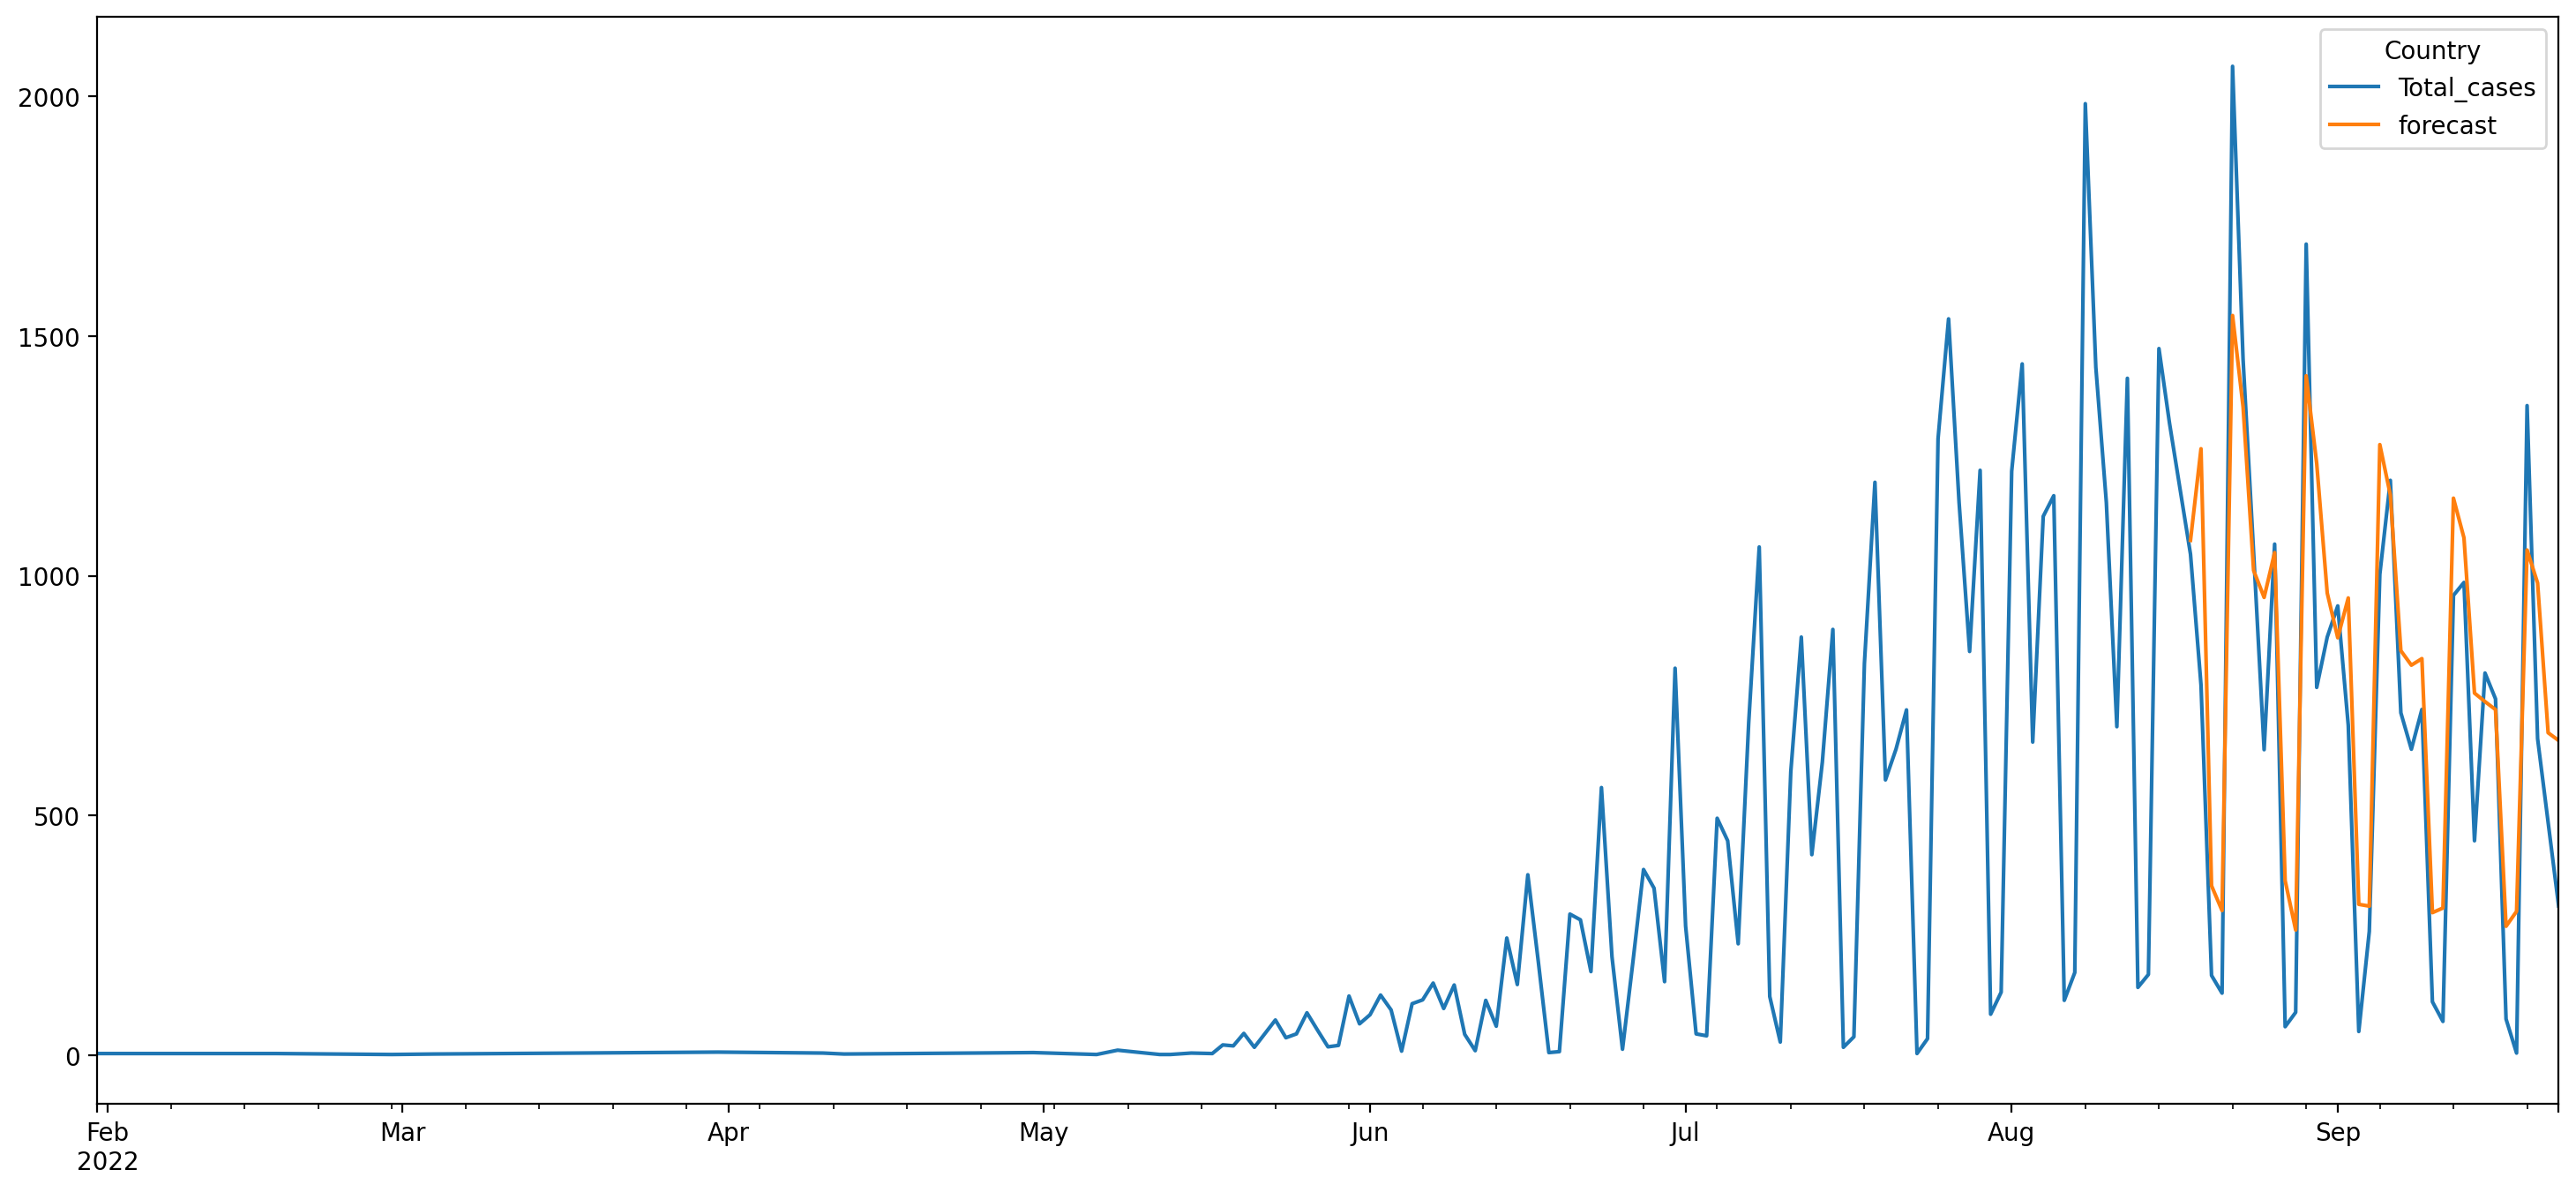

In [37]:
# Testing the ARIMA model using the test dataset
start_index = test.index.min()
end_index = test.index.max()

daily_country_cases['forecast']=arima_model.predict(start=start_index,end=end_index,dynamic=True)
daily_country_cases[['Total_cases','forecast']].plot(figsize=(18,8))
plt.show()

### Results :
*******************************************************************************************************************************


#### Observations :
<uL>
<li>The implemented machine learning model achieved an overall accuracy of approximately 94% in predicting Monkeypox cases based on reported symptoms. This indicates a high level of accuracy in distinguishing between positive and negative cases.</li>
<li>Analysis of feature importance revealed that certain symptoms had a more significant impact on the model's predictions. Symptoms such as fever, rash, and swollen lymph nodes were highly indicative of Monkeypox infection, while other symptoms had less influence on the model's decision-making process.</li>
<li>United States has the most number of confirmed cases.Behind United States, its Spain where cases have been increasing at an alarming rate.</li>
<li>The Monkeypox detection system shows promise for deployment in real-world settings, with potential applications in public health surveillance and response efforts. Integration into existing healthcare infrastructure could enhance disease detection capabilities and facilitate timely interventions to mitigate the spread of Monkeypox.</li>
</ul>

### Conclusion and Future Direction :
*******************************************************************************************************************************
#### Learnings :
<ul>
<li>Understanding the importance of leveraging machine learning techniques for disease surveillance and early detection.</li>
<li>Hands-on experience in preprocessing data, training machine learning models, and evaluating model performance.</li>
<li>Insights into the challenges and considerations involved in developing user-friendly interfaces for symptom-based prediction.</li>
</ul>

#### Results Discussion :
<ul>
<li>The developed machine learning model demonstrates satisfactory performance in accurately identifying Monkeypox cases based on reported symptoms.</li>
<li>Evaluation metrics such as accuracy, F1 score, precision, and recall indicate the effectiveness of the model in disease detection.</li>
<li>The integration of a Gradio interface provides an intuitive platform for individuals to input symptoms and receive timely predictions, enhancing accessibility and usability.</li>
</ul>

#### Limitations :
<ul>
<li>The reliance on symptom-based data may introduce subjectivity and variability in disease detection.</li>
<li>The performance of the model may be influenced by the quality and representativeness of the training data.</li>
<li>Further validation and testing on diverse datasets are necessary to assess the generalizability and robustness of the methodology.</li>
</ul>


*******************************************************************************************************************************
#### Future Extension :
<ul>
<li>Integration of Forecasting: Incorporate time series forecasting techniques to predict future Monkeypox cases, enabling proactive public health interventions.</li>
<li>Enhanced Data Collection: Improve data collection mechanisms to gather more comprehensive and representative datasets for model training.</li>
<li>Model Refinement: Explore advanced machine learning algorithms and optimization techniques to improve model performance and reliability.
Real-time Monitoring: Develop mechanisms for real-time monitoring of Monkeypox outbreaks, enabling rapid response and containment measures.
</li></ul>

# References:

[1] Original Research Paper: https://arxiv.org/pdf/2310.19801.pdf

[2] Gradio Documentation: https://gradio.app/docs

[3] Pandas Documentation: https://pandas.pydata.org/docs/

[4] Scikit-learn Documentation: https://scikit-learn.org/stable/documentation.html

[5] Imbalanced-learn Documentation: https://imbalanced-learn.org/stable/documentation.html

[6] XGBoost Documentation: https://xgboost.readthedocs.io/en/latest/

[7] Plotly Documentation: https://plotly.com/python/

[8] ARIMA Time Series Forecasting: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html

[10] Monkeypox Information: https://www.cdc.gov/poxvirus/monkeypox/index.html